<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# Data Camp RAMP Challenge on the avalanche risk prediction

<i> Florent Blanc, Bryan Chen, Sibylle Degos, Alice Devilder, Rémy Grabet, Théo Paquier </i>

## Introduction

Describe the challenge, in particular:

- Where the data comes from?
- What is the task this challenge aims to solve?
- Why does it matter?

### Avalanche risk

Avalanches pose a significant threat to outdoor enthusiasts, ski patrol teams, and mountain communities. Predicting avalanche risk accurately is crucial for ensuring safety in mountainous regions. This challenge aims to leverage data science to analyze and forecast avalanche risk based on historical reports from Météo-France. By processing and interpreting structured data extracted from avalanche risk bulletins, we can improve preparedness and decision-making in avalanche-prone areas.  

### The BERA database, a catalog of avalanche risk bulletins

The data for this challenge comes from **Météo-France** through the **Bulletins d'Estimation du Risque d'Avalanche (BERA)**, which provide official assessments of avalanche hazards. Originally, these reports were only available in PDF format, making them difficult to analyze systematically. However, [multi-coop](https://gitlab.com/multi-coop/meteofrance_bra_hist) has extracted and structured this data into CSV files, categorized by mountain region (massif) and publication date.

The dataset consists of **34,286 records**, each representing a daily avalanche risk bulletin for a specific massif. It includes **47 features**, covering information on:
- **Avalanche risk levels (`risque1`, `risque2`, `risque_maxi`)** at different altitudes.
- **Geographic and temporal data (`massif`, `altitude`, `date`)**.
- **Weather conditions (`isotherme_0`, `precipitation_neige_veille_epaisseur`, `vent_altitude_*`)**.
- **Risk evolution trends (`evolurisque1`, `evolurisque2`)**.

This dataset provides a historical record of avalanche risk conditions, making it a valuable resource for predictive modeling.

### What is the task this challenge aims to solve?  
The main objective of this challenge is to **predict avalanche risk** based on the structured BERA data. By analyzing historical risk reports and meteorological conditions, we can develop models that estimate avalanche hazards more effectively.  

This task has multiple applications. First, it can help outdoor enthusiasts, ski patrols, and mountain rescue teams plan safer routes and make informed decisions before heading into avalanche-prone terrain. Additionally, the challenge aims to serve as an educational tool for analyzing past avalanche incidents, helping researchers and safety experts understand risk factors. Finally, by improving real-time risk estimation models, the challenge contributes to broader efforts in avalanche forecasting and disaster prevention.  

### Why does it matter?  
Avalanches are a deadly natural hazard, posing risks to skiers, snowboarders, mountaineers, and local communities. Developing accurate avalanche prediction models can save lives by providing crucial insights into when and where avalanches are most likely to occur.  

Improved avalanche forecasting enhances safety measures for ski resorts, backcountry travelers, and rescue operations. It also contributes to environmental and climate research, as avalanche behavior is influenced by broader weather patterns and climate change. By transforming unstructured reports into actionable insights, this challenge harnesses the power of data science to improve preparedness and response in mountainous regions.  

# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it.
This is the first set in any data science project, and here, you should give a sense of the data the participants will be working with.

You can first load and describe the data, and then show some interesting properties of it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns

### Get access to the training data

In [2]:
import problem
X_df_van, y_van = problem.get_train_data('VANOISE')

X_train.csv


First, we get the whole dataset to get a sense of the data we are working with.

In [3]:
X_df, y = problem.get_data()

bera_clean.csv


In [4]:
data = pd.concat([X_df,y],axis=1)

## The static features

- **Avalanche Risk Levels**: 
  - `risque1`: Estimated risk level for all altitudes or the lowest ones.
  - `risque2`: Estimated risk level for the highest altitudes.
  - `risque_maxi`: The highest risk level reported for a given massif.
- **Geographic and Temporal Information**:
  - `date`: The publication date of the bulletin.
  - `massif`: The mountain region for which the risk is assessed.
  - `altitude`: Altitude information, if available.
- **Meteorological Conditions**:
  - `isotherme_0`: Altitude of the 0°C isotherm.
  - `isotherme_moins_10`: Altitude of the -10°C isotherm.
  - `precipitation_neige_veille_epaisseur`: Snowfall height measured the day before.
  - `vitesse_vent_altitude_1`: Wind speed at a lower altitude.
  - `vitesse_vent_altitude_2`: Wind speed at a higher altitude.
  - `direction_vent_altitude_1`: Wind direction at a lower altitude.
  - `direction_vent_altitude_2`: Wind direction at a higher altitude.
  - `limite_pluie_neige`: Rain-snow limit altitude.
- **Risk Evolution and Additional Context**:
  - `evolurisque1`, `evolurisque2`: Evolution of risk levels over time.
  - `commentaire`: Additional commentary on risk conditions.
  - `url_telechargement`: Link to the original BERA report in PDF format. 

In [5]:
X_df.head()

,massif,evolurisque1,evolurisque2,altitude,risque1,risque2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,temps,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,direction_vent_altitude_1,vitesse_vent_altitude_1,direction_vent_altitude_2,vitesse_vent_altitude_2,is_pluie
date,,,,,,,,,,,,,,,,,,,,
2018-12-18 00:00:00,ANDORRE,2.337687,2.64523,2300.0,1.0,2.0,1800,0,Peu nuageux,0,-1,3200,4600,2000,3000,_,0,NW,30,0
2018-12-18 06:00:00,ANDORRE,2.337687,2.64523,2300.0,1.0,2.0,1800,0,Beau temps,0,-1,3200,4700,2000,3000,NE,10,W,40,0
2018-12-18 12:00:00,ANDORRE,2.337687,2.64523,2300.0,1.0,2.0,1800,0,Brume,0,-1,3200,4800,2000,3000,_,0,W,40,0
2018-12-19 00:00:00,ANDORRE,2.337687,2.64523,2300.0,1.0,2.0,1800,0,Très nuageux,0,-1,2700,4400,2000,3000,S,10,SW,50,0
2018-12-19 06:00:00,ANDORRE,2.337687,2.64523,2300.0,1.0,2.0,1800,0,Peu nuageux,0,-1,2000,3900,2000,3000,_,0,W,60,0


In [6]:
# Summary statistics
data.describe()

,evolurisque1,evolurisque2,altitude,risque1,risque2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,vitesse_vent_altitude_1,vitesse_vent_altitude_2,is_pluie,risque_maxi
count,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000,81999.000000
mean,2.337687,2.645230,2247.536618,1.641313,2.038927,1778.585410,2.114038,32.251918,355.012146,2216.837327,3908.666654,2197.002707,2151.955512,20.133550,26.677947,0.123111,2.165222
std,0.218249,0.133012,182.660860,0.762309,0.824541,195.216694,6.151373,229.580003,742.653428,882.196936,953.762301,649.280629,1364.123487,19.005621,26.487310,0.328567,0.806580
min,1.000000,1.000000,1300.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000
25%,2.337687,2.645230,2247.536618,1.000000,1.000000,1800.000000,0.000000,0.000000,-1.000000,1600.000000,3400.000000,2000.000000,-1.000000,10.000000,-1.000000,0.000000,2.000000
50%,2.337687,2.645230,2247.536618,1.000000,2.000000,1800.000000,0.000000,0.000000,-1.000000,2300.000000,4100.000000,2000.000000,3000.000000,10.000000,20.000000,0.000000,2.000000
75%,2.337687,2.645230,2247.536618,2.000000,3.000000,1800.000000,1.000000,0.000000,-1.000000,2900.000000,4600.000000,3000.000000,3000.000000,30.000000,40.000000,0.000000,3.000000
max,5.000000,4.000000,3600.000000,5.000000,5.000000,1800.000000,70.000000,3100.000000,4100.000000,4700.000000,6300.000000,3000.000000,4000.000000,150.000000,160.000000,1.000000,5.000000


## The risk levels

The avalanche risk levels are classified into five categories, ranging from low to extreme risk. These levels are defined as follows:

- **Level 1 (Low)**: Low risk of avalanches, natural triggers are unlikely.

- **Level 2 (Moderate)**: Moderate risk of avalanches, natural triggers are possible.

- **Level 3 (Considerable)**: Considerable risk of avalanches, natural triggers are likely.

- **Level 4 (High)**: High risk of avalanches, natural triggers are very likely.

- **Level 5 (Very High)**: Very high risk of avalanches, natural triggers are certain.

The risk levels are reported for different altitudes, with `risque1` and `risque2` representing the risk levels at lower and higher altitudes, respectively. The `risque_maxi` variable indicates the highest risk level reported for a given massif.

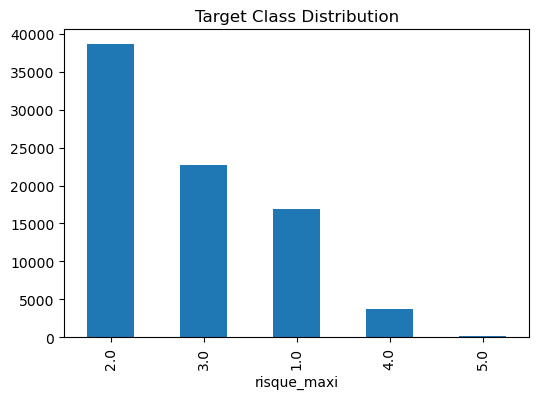

In [7]:
# Class distribution
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.title("Target Class Distribution")
plt.show()

Check the number of Nan per column

In [8]:
print("Missing Values:\n", data.isna().sum())

Missing Values:
 massif                                  0
evolurisque1                            0
evolurisque2                            0
altitude                                0
risque1                                 0
risque2                                 0
precipitation_neige_veille_altitude     0
precipitation_neige_veille_epaisseur    0
temps                                   0
mer_de_nuages                           0
limite_pluie_neige                      0
isotherme_0                             0
isotherme_moins_10                      0
altitude_vent_1                         0
altitude_vent_2                         0
direction_vent_altitude_1               0
vitesse_vent_altitude_1                 0
direction_vent_altitude_2               0
vitesse_vent_altitude_2                 0
is_pluie                                0
risque_maxi                             0
dtype: int64


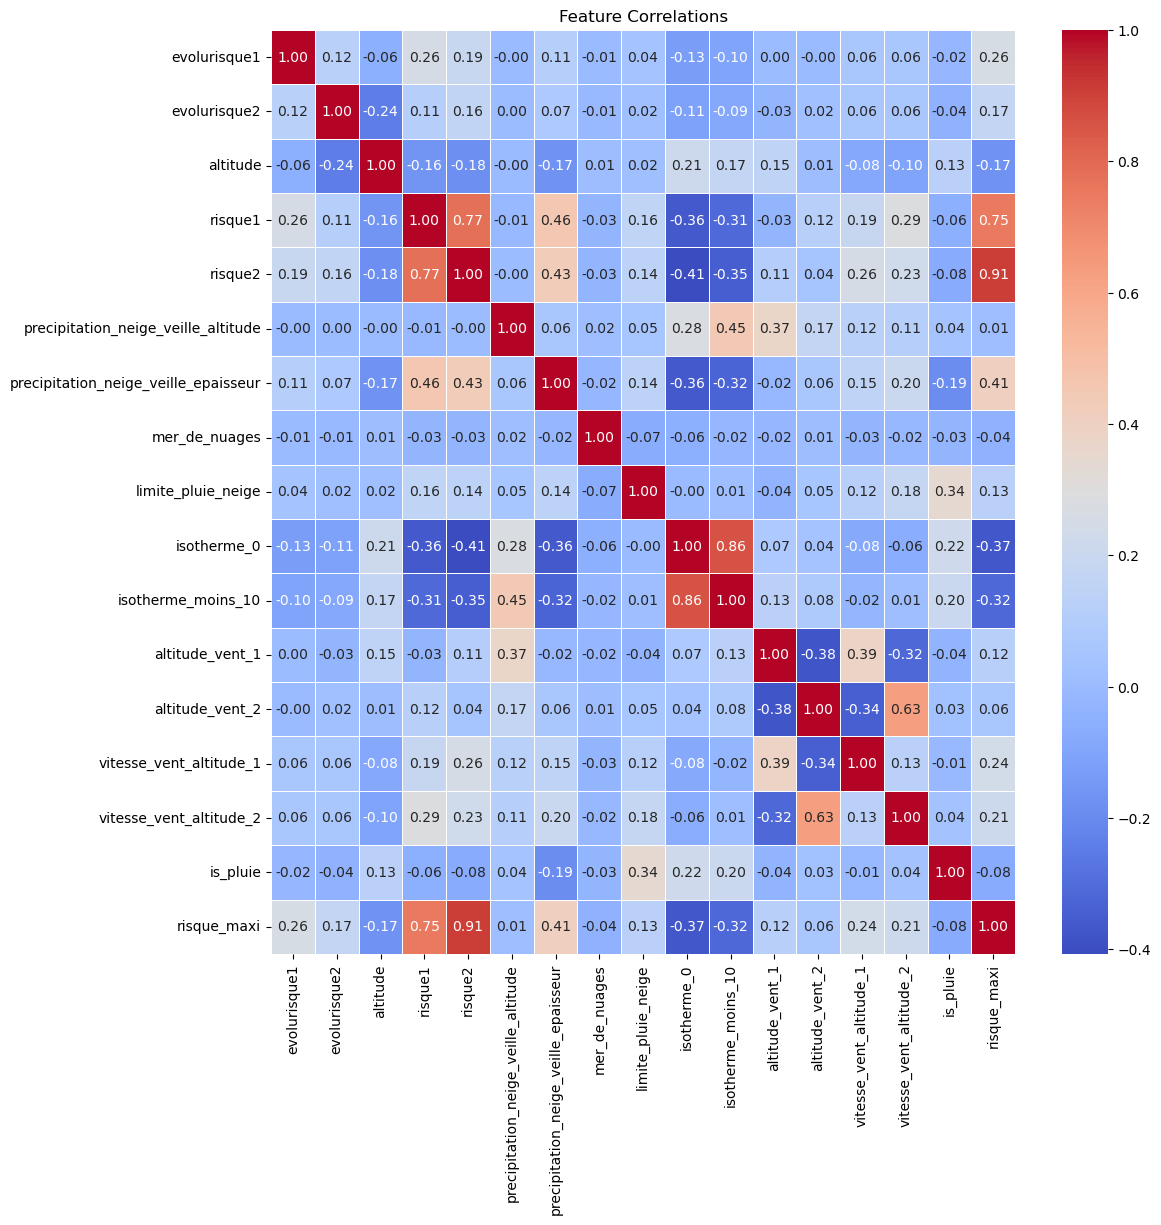

In [9]:
# Select only numerical columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()

Check the mean risk for each massif :

In [10]:
massifs = data['massif'].unique()
massifs

array(['ANDORRE', 'ARAVIS', 'ASPE-OSSAU', 'AURE-LOURON', 'BAUGES',
       'BEAUFORTAIN', 'BELLEDONNE', 'CAPCIR-PUYMORENS',
       'CERDAGNE-CANIGOU', 'CHABLAIS', 'CHAMPSAUR', 'CHARTREUSE',
       'CINTO-ROTONDO', 'COUSERANS', 'DEVOLUY', 'EMBRUNAIS-PARPAILLON',
       'GRANDES-ROUSSES', 'HAUT-VAR_HAUT-VERDON', 'HAUTE-ARIEGE',
       'HAUTE-BIGORRE', 'HAUTE-MAURIENNE', 'HAUTE-TARENTAISE',
       'LUCHONNAIS', 'MAURIENNE', 'MERCANTOUR', 'MONT-BLANC', 'OISANS',
       'ORLU__ST_BARTHELEMY', 'PAYS-BASQUE', 'PELVOUX', 'QUEYRAS',
       'RENOSO-INCUDINE', 'THABOR', 'UBAYE', 'VANOISE', 'VERCORS'],
      dtype=object)

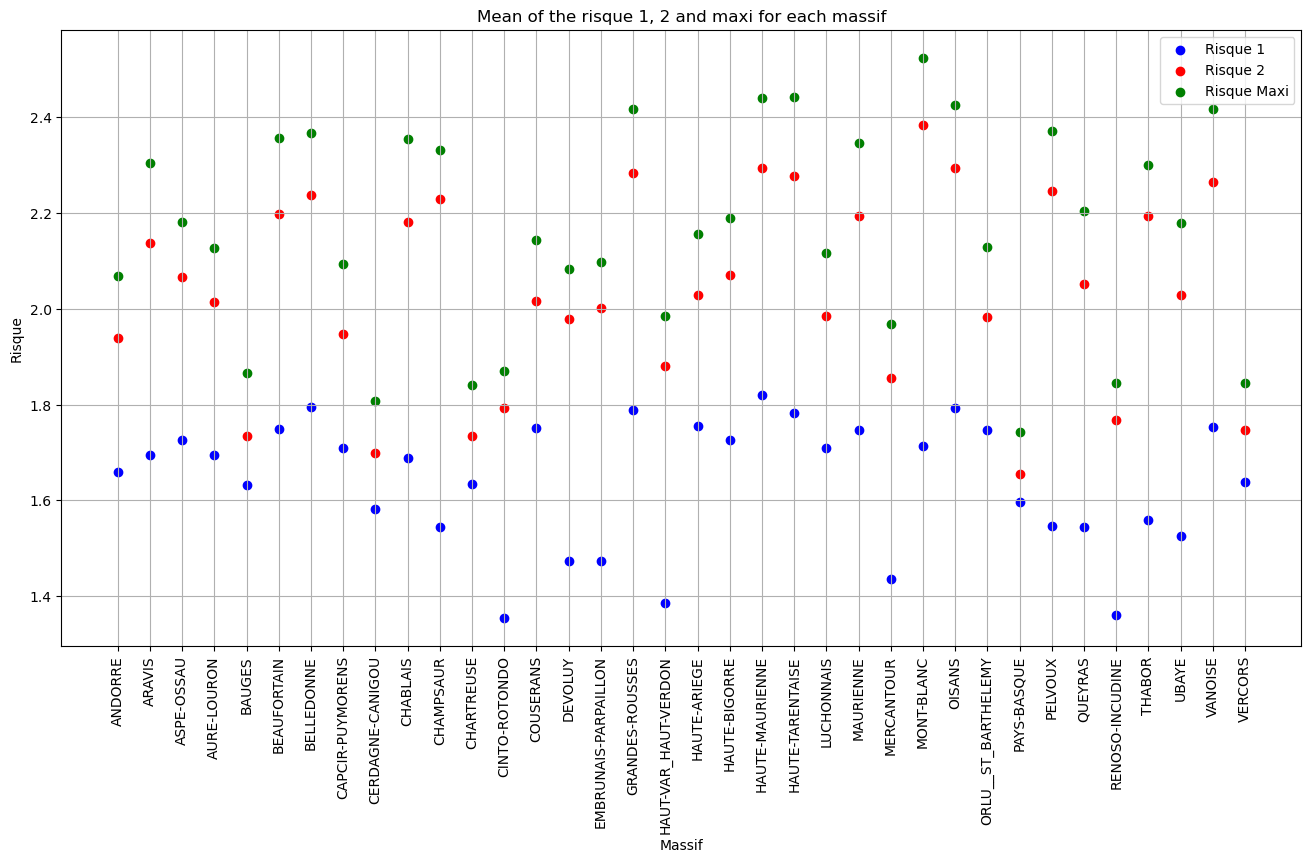

In [11]:
data_massif = data.groupby('massif')

# Plot the mean of the target variable for each massif and the risque 2 variable
plt.figure(figsize=(16,8))
plt.scatter(massifs, data_massif['risque1'].mean(), c='b')
plt.scatter(massifs, data_massif['risque2'].mean(), c='r')
plt.scatter(massifs, data_massif['risque_maxi'].mean(), c='g')
plt.xticks(rotation=90)
plt.xlabel('Massif')
plt.ylabel('Risque')
plt.legend(['Risque 1', 'Risque 2', 'Risque Maxi'])
plt.title('Mean of the risque 1, 2 and maxi for each massif')
plt.grid()
plt.show()

### Create a time series plot of the risk levels

The date is not unique so we will have to group by massif and then date to plot the risk levels over time.

In [12]:
df_massifs = {massif: data[data['massif'] == massif] for massif in massifs}

In [13]:
# def reshape_massif_data(df):
#     """
#     Reshapes the dataframe to keep all columns while ensuring 
#     each day has 3 rows (one for 00:00, one for 06:00, and one for 12:00).
#     """

#     # Identify core variable names (without time prefixes)
#     core_vars = [
#         "temps", "mer_de_nuages", "limite_pluie_neige", "isotherme_0",
#         "isotherme_moins_10", "altitude_vent_1", "altitude_vent_2",
#         "direction_vent_altitude_1", "vitesse_vent_altitude_1",
#         "direction_vent_altitude_2", "vitesse_vent_altitude_2"
#     ]

#     # Keep non-time-dependent columns
#     other_columns = [
#         "date", "massif", "evolurisque1", "altitude", "risque1", "risque2", "risque_maxi",
#         "precipitation_neige_veille_altitude", "precipitation_neige_veille_epaisseur"
#     ]

#     reshaped_data = []

#     # Process each time 
#     for time in ["00", "06", "12"]:
#         # Select the time-specific columns
#         selected_cols = [f"{time}_{var}" for var in core_vars]

#         # Extract the relevant columns
#         df_subset = df[other_columns + selected_cols].copy()

#         # Rename time-prefixed columns to remove the time prefix
#         df_subset.columns = other_columns + core_vars

#         # Set the correct time for each row
#         df_subset["date"] = df_subset["date"].dt.normalize() + pd.to_timedelta(f"{time}:00:00")

#         # Append transformed dataframe
#         reshaped_data.append(df_subset)

#     # Concatenate the three time-based DataFrames
#     return pd.concat(reshaped_data).sort_values(by=["massif", "date"]).reset_index(drop=True)

# # Apply transformation for all massifs
# df_transformed_massifs = {massif: reshape_massif_data(df) for massif, df in df_massifs.items()}

# # Merge all massifs into a single DataFrame
# df_final = pd.concat(df_transformed_massifs.values()).reset_index(drop=True)

# # Check the result
# print(df_final.head())


In [14]:
df_massifs['VANOISE'].head()

,massif,evolurisque1,evolurisque2,altitude,risque1,risque2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,temps,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,direction_vent_altitude_1,vitesse_vent_altitude_1,direction_vent_altitude_2,vitesse_vent_altitude_2,is_pluie,risque_maxi
date,,,,,,,,,,,,,,,,,,,,,
2018-12-17 00:00:00,VANOISE,2.337687,2.64523,2400.0,2.0,3.0,1800,10,Neige modérée,0,1200,1500,3000,3000,4000,NW,20,NW,30,0,3.0
2018-12-17 06:00:00,VANOISE,2.337687,2.64523,2400.0,2.0,3.0,1800,10,Neige faible,0,1000,1100,2700,3000,4000,NW,30,NW,60,0,3.0
2018-12-17 12:00:00,VANOISE,2.337687,2.64523,2400.0,2.0,3.0,1800,10,Variable,0,-1,1100,2600,3000,4000,NW,30,NW,50,0,3.0
2018-12-18 00:00:00,VANOISE,2.337687,2.64523,2400.0,2.0,3.0,1800,3,Beau temps,0,-1,1900,3900,3000,4000,NW,10,NW,50,0,3.0
2018-12-18 06:00:00,VANOISE,2.337687,2.64523,2400.0,2.0,3.0,1800,3,Beau temps,0,-1,2200,4000,3000,4000,W,10,NW,30,0,3.0


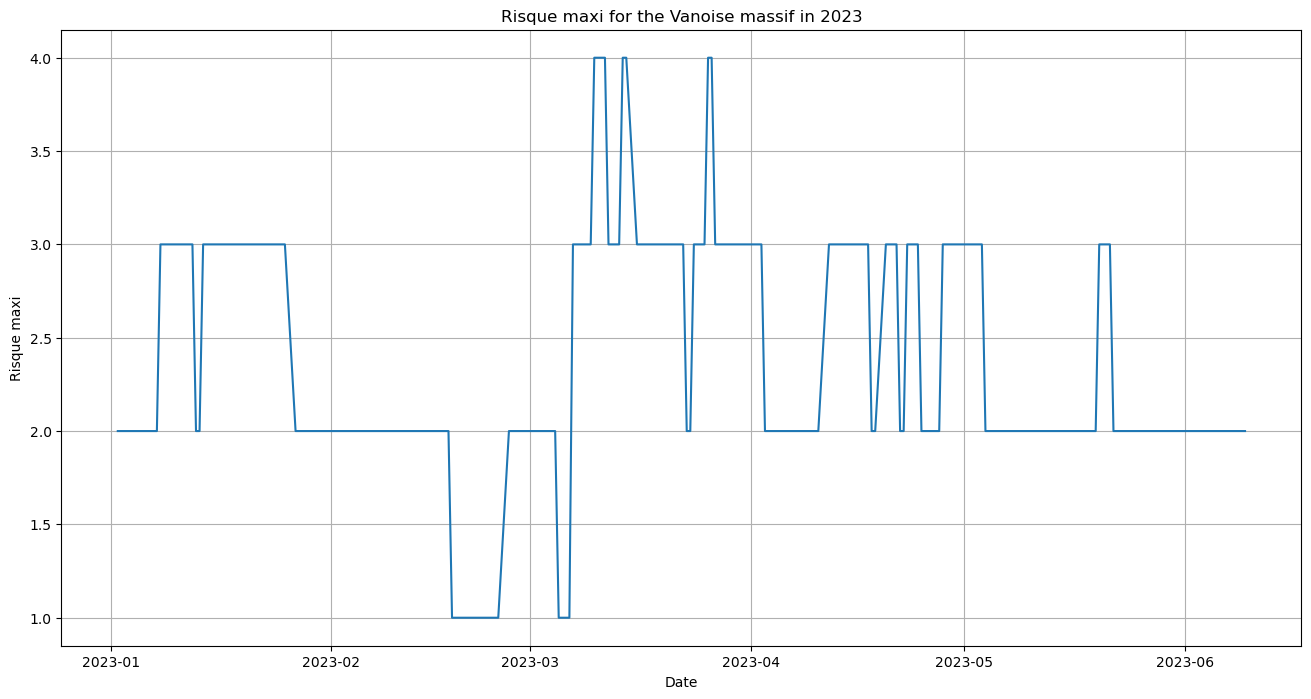

In [15]:
# Plot the risque 1 for the Vanoise massif in 2023
vanoise_2023 = df_massifs['VANOISE'][df_massifs['VANOISE'].index.year == 2023]
plt.figure(figsize=(16,8))
plt.plot( vanoise_2023['risque_maxi'])
plt.xlabel('Date')
plt.ylabel('Risque maxi')
plt.title('Risque maxi for the Vanoise massif in 2023')
plt.grid()
plt.show()

Convert object features to integers when possible

In [16]:
# def convert_object_to_int(df_massifs, columns_to_convert):
#     """
#     Convert an object column to integer.
#     """
#     for massif, df in df_massifs.items():
#         # set date as index
#         df.set_index('date', inplace=True)

#         # convert columns to numeric
#         for col in columns_to_convert:
#             column_data = df[col]
#             column_data_numeric = pd.to_numeric(column_data, errors='coerce')
#             if col == 'precipitation_neige_veille_epaisseur':
#                 df['is_pluie'] = (column_data == "Pluie").astype(int)
#                 column_data_numeric = np.nan_to_num(column_data_numeric, nan=-1).astype(int)
#             if col == 'mer_de_nuages':
#                 column_data_numeric = column_data_numeric.fillna(column_data.replace({
#                     "Non": 0,  # Assign 0 for "Non"
#                     "Absence de données": -1  # Assign -1 for missing data
#                 })).infer_objects(copy=False).astype(int)
#             else:
#                 column_data_numeric = np.nan_to_num(column_data_numeric, nan=-1).astype(int)
#             df_massifs[massif][col] = column_data_numeric


# columns_to_convert = ['precipitation_neige_veille_altitude', 'precipitation_neige_veille_epaisseur', 'mer_de_nuages', 
#                         'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10', 'altitude_vent_1', 'altitude_vent_2',
#                         'vitesse_vent_altitude_1', 'vitesse_vent_altitude_2']

# df_transformed_massifs = convert_object_to_int(df_massifs, columns_to_convert)

## Correlation matrix across the massifs and the mean correlation

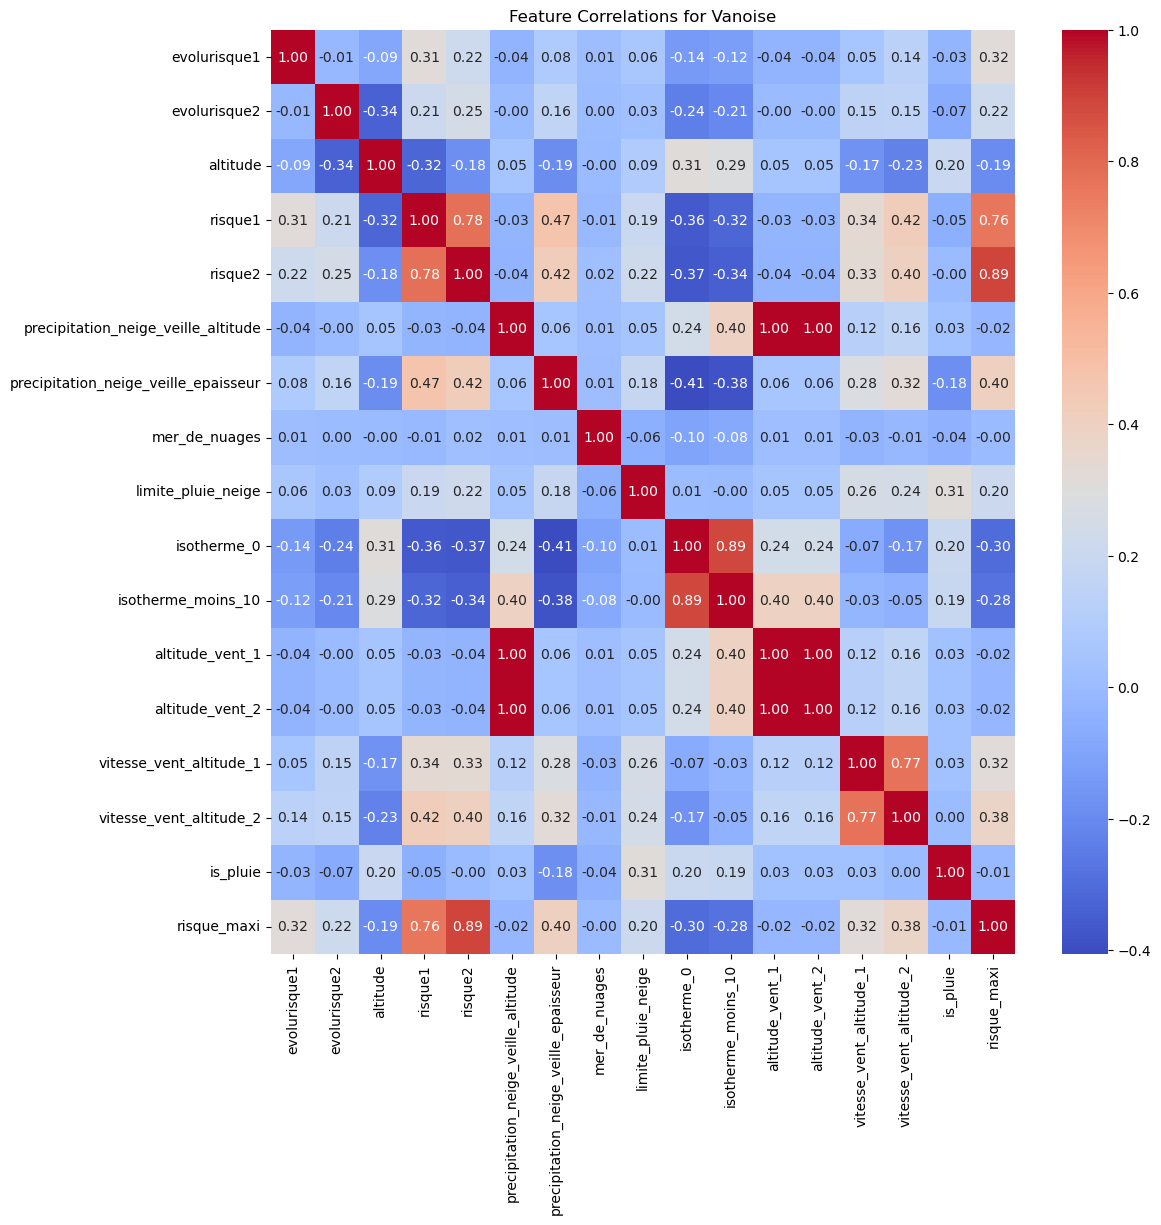

In [17]:
# Plot the correlation heatmap of the vanoise massif
numeric_data_vanoise = df_massifs['VANOISE'].select_dtypes(include=['number'])
corr_matrix = numeric_data_vanoise.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations for Vanoise")
plt.show()

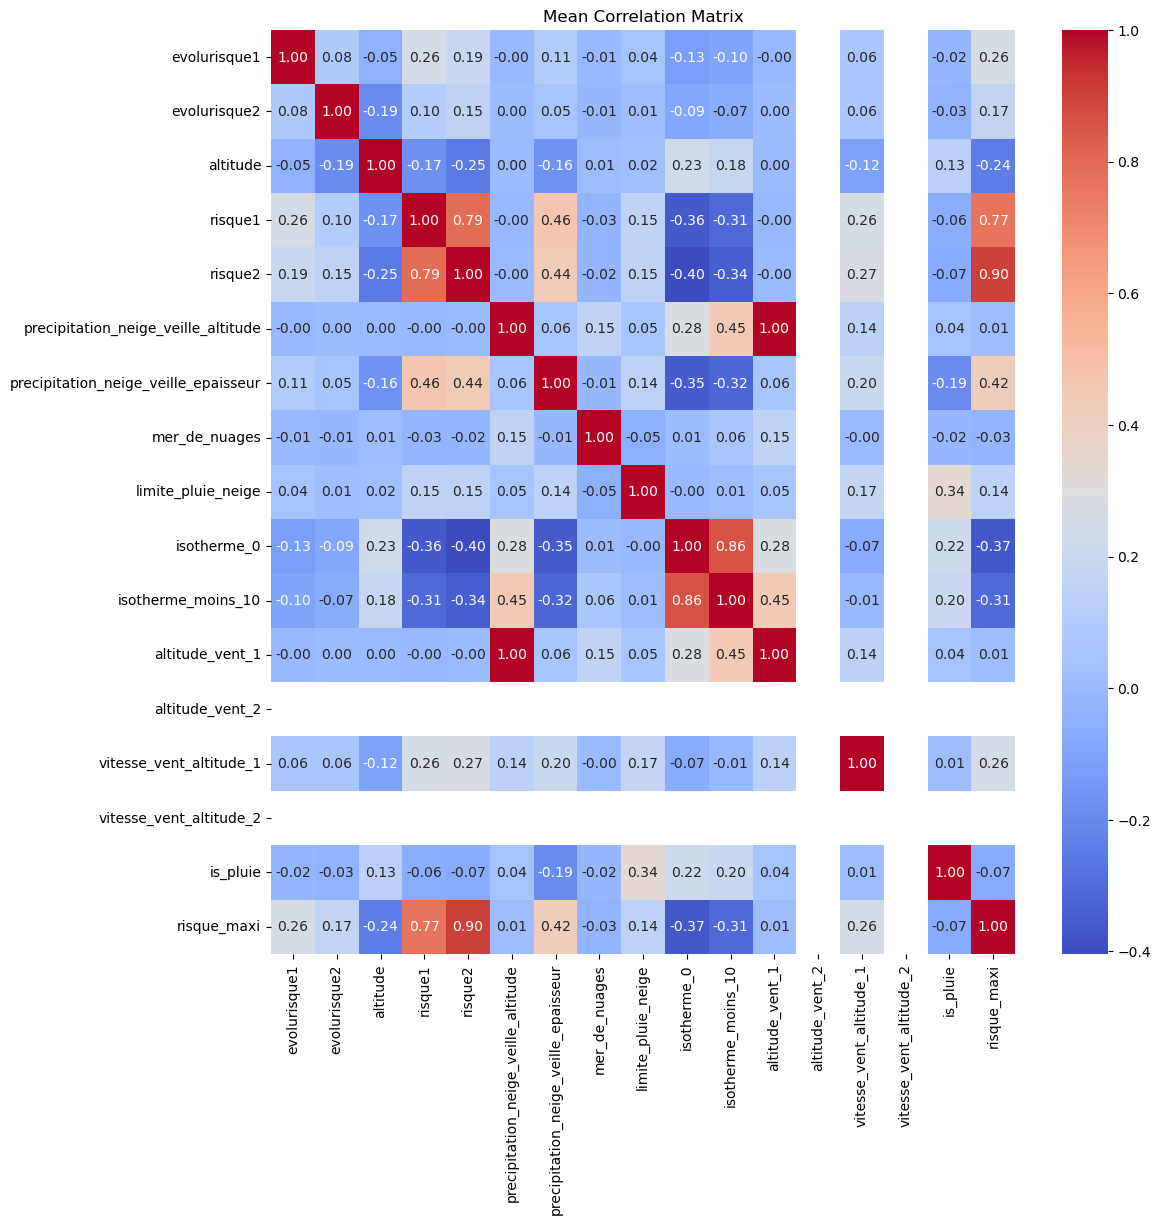

In [18]:
correlation_matrices = []

# Compute the correlation matrix for each region for hourly data
for _, df in df_massifs.items():
    if not df.empty:
        numeric_data = df.select_dtypes(include=['number'])
        corr_matrix = numeric_data.corr()
        correlation_matrices.append(corr_matrix)

# Compute the mean correlation matrix
if correlation_matrices:
    mean_correlation_matrix = sum(correlation_matrices) / len(correlation_matrices)

# Plot the mean correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Correlation Matrix')
plt.show()

In [19]:
# Correlation with the target variable
mean_correlation_matrix['risque_maxi'].sort_values(ascending=False)


risque_maxi                             1.000000
risque2                                 0.902100
risque1                                 0.765432
precipitation_neige_veille_epaisseur    0.420416
evolurisque1                            0.262675
vitesse_vent_altitude_1                 0.255907
evolurisque2                            0.166110
limite_pluie_neige                      0.139559
altitude_vent_1                         0.008103
precipitation_neige_veille_altitude     0.008103
mer_de_nuages                          -0.030408
is_pluie                               -0.070030
altitude                               -0.244303
isotherme_moins_10                     -0.310173
isotherme_0                            -0.365460
altitude_vent_2                              NaN
vitesse_vent_altitude_2                      NaN
Name: risque_maxi, dtype: float64

The correlation analysis indicates that **`risque2` (0.90) and `risque1` (0.77)** have the strongest positive relationships with `risque_maxi`, reinforcing their importance in predicting avalanche risk. Indeed, `risque_maxi` has been obtained by taking the maximum value between `risque1` and `risque2`, which explains the high correlation values.
Additionally, **`precipitation_neige_veille_epaisseur` (0.42)** shows a moderate positive correlation, suggesting that the amount of recent snowfall significantly influences avalanche risks. **`evolurisque1` (0.26), `vitesse_vent_altitude_1` (0.26), and `evolurisque2` (0.17)** also contribute meaningfully to the risk estimation process.

On the other hand, several features exhibit weak or negligible correlations, such as **`altitude_vent_1` (0.008), `precipitation_neige_veille_altitude` (0.008), `mer_de_nuages` (-0.03), and `is_pluie` (-0.07)**, indicating they may not significantly impact avalanche risk. 

Some features, including **`altitude` (-0.24), `isotherme_0` (-0.37), and `isotherme_moins_10` (-0.31)**, have moderate negative correlations, suggesting that lower altitudes and lower freezing levels might be associated with higher risks, but further investigation is needed before removal. 

Finally, **`altitude_vent_2` and `vitesse_vent_altitude_2`** contain missing correlation values (NaN), implying data inconsistencies or sparsity, making them strong candidates for removal. Based on these insights, we recommend keeping highly correlated features while dropping those with weak or missing correlations to enhance model performance.

In [20]:
# Create a list containig the features that have a correlation with the target variable greater than 0.1
features = mean_correlation_matrix['risque_maxi'][abs(mean_correlation_matrix['risque_maxi']) > 0.1].index.tolist()

In [21]:
for massif, df in df_massifs.items():
    df_massifs[massif] = df[features]

In [22]:
# y_df = y.to_frame().reset_index(drop=True)
# y_expanded = pd.concat([y_df] * 3, ignore_index=True)
# y_expanded = y_expanded.squeeze()


### Split the data into training and testing sets

As we are dealing with time series data, we will split the dataset based on the publication date.For the training data, we will use bulletins published from 2018 to 2022, and for the testing data, we will use bulletins published in 2023.

In [23]:
X_train_dict = {}
y_train_dict = {}
X_test_dict = {}
y_test_dict = {}

for massif in massifs:
    X_train_dict[massif], y_train_dict[massif] = problem.get_train_data(massif)
    X_test_dict[massif], y_test_dict[massif] = problem.get_test_data(massif)

c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({


X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv


c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv


c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv


c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv
X_train.csv
X_test.csv


c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = df[col].replace({
c:\Users\alice\Desktop\Alice\IP Paris\M2\Data Camp\avalanches_prediction\problem.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

# Challenge evaluation

A particularly important point in a challenge is to describe how it is evaluated. This is the section where you should describe the metric that will be used to evaluate the participants' submissions, as well as your evaluation strategy, in particular if there is some complexity in the way the data should be split to ensure valid results.

# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [24]:
# %load submissions/starting_kit/estimator.py

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


def get_estimator(df_final):
    # Identify numerical and categorical features
    num_features = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

    # Preprocessing Pipelines
    num_pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler()
    )

    cat_pipeline = make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore')
    )

    # Combine preprocessing steps
    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

    # Define Model Pipeline 
    model_pipeline = make_pipeline(
        preprocessor,
        LogisticRegression(max_iter=1000)
    )
    # model_pipeline = make_pipeline(
    #     preprocessor,
    #     RandomForestClassifier(n_estimators=500, random_state=42)
    # )

    return model_pipeline


## Testing using a scikit-learn pipeline

In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
model = get_estimator(X_df_van)
scores = cross_val_score(model, X_df_van, y_van, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy Scores for the Vanoise massif:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores for the Vanoise massif: [0.64959569 0.606469   0.56873315 0.53369272 0.67027027]
Mean Accuracy: 0.6057521672616012
Standard Deviation: 0.05029577455096096


In [26]:
from sklearn.metrics import accuracy_score

# Train and Evaluate the Model for Each Massif
accuracy_results = {}

for massif in X_train_dict.keys():
    print(f"Training model for {massif}...")

    X_train = X_train_dict[massif]
    y_train = y_train_dict[massif]
    X_test = X_test_dict[massif]
    y_test = y_test_dict[massif]

    if X_train.empty or X_test.empty:
        print(f"Skipping {massif} due to lack of data.")
        continue

    model = get_estimator(X_train)  # Pass massif-specific dataset
    model.fit(X_train, y_train)  # Train model

    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy

    accuracy_results[massif] = accuracy
    print(f"Accuracy for {massif}: {accuracy:.4f}\n")

# Display overall results
print("\nOverall Accuracy Results:")
for massif, acc in accuracy_results.items():
    print(f"{massif}: {acc:.4f}")

# Compute Mean Accuracy Across Massifs
mean_accuracy = np.mean(list(accuracy_results.values()))
print(f"\nMean Accuracy Across Massifs: {mean_accuracy:.4f}")

Training model for ANDORRE...


ValueError: columns are missing: {'evolurisque1', 'evolurisque2', 'vitesse_vent_altitude_1', 'altitude'}

## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).